In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas

main_df = pandas.read_csv("./hotel_bokings_2016.csv", sep=',')
main_df

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,days_in_hotel,all_guests
0,3738,Resort Hotel,0,109,2016,January,1,1,0,1,...,NaN,0,Transient-Party,59.94,0,1,Check-Out,2016-01-02,1,2.0
1,3739,Resort Hotel,0,109,2016,January,1,1,0,1,...,NaN,0,Transient-Party,116.10,1,1,Check-Out,2016-01-02,1,4.0
2,3740,Resort Hotel,1,2,2016,January,1,1,0,1,...,NaN,0,Transient,89.00,0,1,No-Show,2016-01-01,1,2.0
3,3741,Resort Hotel,0,88,2016,January,1,1,0,2,...,NaN,0,Transient,73.46,0,2,Check-Out,2016-01-03,2,2.0
4,3742,Resort Hotel,1,20,2016,January,1,1,0,2,...,NaN,0,Transient,119.00,0,0,Canceled,2015-12-22,2,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56702,104142,City Hotel,0,17,2016,December,53,30,2,5,...,NaN,0,Transient,90.34,0,1,Check-Out,2017-01-06,7,2.0
56703,104145,City Hotel,0,177,2016,December,53,30,2,5,...,NaN,0,Transient,1.29,0,2,Check-Out,2017-01-06,7,0.0
56704,104147,City Hotel,0,107,2016,December,53,31,2,5,...,NaN,0,Transient,103.57,0,0,Check-Out,2017-01-07,7,2.0
56705,104216,City Hotel,0,310,2016,December,53,27,2,10,...,NaN,0,Transient-Party,68.57,0,2,Check-Out,2017-01-08,12,2.0


In [2]:
plt.rcParams['figure.figsize'] = [15, 5]
def plot_two_columns(col_one_name, col_two_name, data_frame):
    x = data_frame[col_one_name]
    y = data_frame[col_two_name]
    plt.ylabel(col_two_name)
    plt.xlabel(col_one_name)
    plt.scatter(x,y, marker='.', alpha=0.05, cmap='viridis')
    plt.show()
    

In [3]:
#Ilosc gosci z danych krajow
country_to_guest_dict = {}

for i in range(len(main_df)):
    country_code = main_df['country'][i]
    if country_code not in country_to_guest_dict:
        country_to_guest_dict[country_code] = 0
    country_to_guest_dict[country_code] += main_df['all_guests'][i]
    
country_to_guest_dict = dict(sorted(country_to_guest_dict.items(), key=lambda item: item[1]))
print(country_to_guest_dict)

{'CAF': 1.0, 'UZB': 1.0, 'SYC': 1.0, 'GUY': 1.0, 'ATA': 1.0, 'SYR': 2.0, 'BDI': 2.0, 'PLW': 2.0, 'HND': 2.0, 'ZMB': 2.0, 'IMN': 2.0, 'BEN': 2.0, 'VGB': 2.0, 'GHA': 2.0, 'BFA': 2.0, 'LKA': 2.0, 'MLI': 2.0, 'BHR': 2.0, 'NAM': 2.0, 'PRY': 2.0, 'DMA': 2.0, 'PYF': 2.0, 'LIE': 2.0, 'LCA': 2.0, 'COM': 3.0, 'UGA': 3.0, 'RWA': 3.0, 'NIC': 3.0, 'ABW': 3.0, 'SLV': 3.0, 'DOM': 4.0, 'MWI': 4.0, 'KHM': 4.0, 'MCO': 4.0, 'MAC': 4.0, 'BRB': 4.0, 'AIA': 4.0, 'MNE': 4.0, 'GGY': 5.0, 'GAB': 5.0, 'PAN': 5.0, 'JAM': 6.0, 'CIV': 6.0, 'SEN': 6.0, 'TMP': 6.0, 'GLP': 6.0, 'KEN': 6.0, 'MUS': 7.0, 'IRQ': 7.0, 'LBY': 7.0, 'AND': 8.0, 'CUB': 8.0, 'CMR': 8.0, 'SUR': 8.0, 'JOR': 8.0, 'TZA': 8.0, 'GNB': 9.0, 'JEY': 10.0, 'VNM': 10.0, 'MDV': 10.0, 'ALB': 11.0, 'ARM': 11.0, 'MKD': 11.0, 'PAK': 12.0, 'CRI': 12.0, 'PRI': 13.0, 'BLR': 14.0, 'BIH': 15.0, 'QAT': 15.0, 'KAZ': 16.0, 'TJK': 16.0, 'KWT': 18.0, 'BOL': 18.0, 'GIB': 19.0, 'PHL': 20.0, 'AZE': 20.0, 'GEO': 22.0, 'MLT': 22.0, 'ECU': 22.0, 'LBN': 23.0, 'PER': 24.0, 'BG

In [7]:
def get_df_for_given_country(country_code):
    df = main_df.copy()
    df = df[df['country'] == country_code]
    df = df.drop(columns=['arrival_date_year',
                      'required_car_parking_spaces',
                      'arrival_date_day_of_month',
                      'meal', 'country',
                      'market_segment', 'distribution_channel',
                      'is_repeated_guest', 'previous_cancellations',
                      'previous_bookings_not_canceled', 'reserved_room_type',
                      'deposit_type', 'agent', 'company', 'customer_type',
                      'reservation_status', 'reservation_status_date'])
    return df

def show_months_with_number_of_guests(data_frame):
    #Miesiac a ilosc gosci
    months_to_guests = {"January":0, "February":0, "March":0, "April":0, "May":0, "June":0,
              "July":0, "August":0, "September":0, "October":0, "November":0, "December":0}
    for i in data_frame.index:
        month = data_frame['arrival_date_month'][i]
        if month not in months_to_guests:
            months_to_guests[month] = 0
        months_to_guests[month] += data_frame['all_guests'][i]

    months = ["January", "February", "March", "April", "May", "June",
              "July", "August", "September", "October", "November", "December"]
    months_to_guests_values = []
    for month in months:
        months_to_guests_values.append(months_to_guests[month])

    plt.scatter(months, months_to_guests_values)
    plt.title("ALL hotels")
    plt.show()
    
def show_months_with_number_of_guests_with_hotel(data_frame, hotel_type):
    #Miesiac a ilosc gosci dla city hotel
    months_to_guests = {"January":0, "February":0, "March":0, "April":0, "May":0, "June":0,
              "July":0, "August":0, "September":0, "October":0, "November":0, "December":0}
    for i in data_frame.index:
        if data_frame['hotel'][i] != hotel_type:
            continue
        month = data_frame['arrival_date_month'][i]
        if month not in months_to_guests:
            months_to_guests[month] = 0
        months_to_guests[month] += data_frame['all_guests'][i]

    months = ["January", "February", "March", "April", "May", "June",
              "July", "August", "September", "October", "November", "December"]
    months_to_guests_values = []
    for month in months:
        months_to_guests_values.append(months_to_guests[month])

    plt.scatter(months, months_to_guests_values)
    plt.title(hotel_type)
    plt.show()

    #Metoda 3 sigma
def show_isolated_cases(data_frame, column_name, sigma = 3.0, print_isolated = False):
    mean = data_frame[column_name].mean()
    std = data_frame[column_name].std()
    limit = sigma * std
    
    idx = 0
    for i in data_frame.index:
        value = data_frame[column_name][i]
        if np.fabs(value - mean) > limit:
            plt.plot(idx, value, marker='.', color='red')
            if print_isolated:
                print(main_df.loc[i, :])
                print()
        else:
            plt.plot(idx, value, marker='.', color='blue')
        idx += 1
    plt.ylabel(column_name)
    plt.xlabel('Liczba porzadkowa')
    plt.show()

def remove_outliners(df, column_name, sigma=3.0):
    drop_indexes = []
    mean = df[column_name].mean()
    std = df[column_name].std()
    limit = sigma*std
    for i in df.index:
        value = df[column_name][i]
        if np.fabs(value - mean) > limit:
            drop_indexes.append(i)
    return drop_indexes

In [11]:
portugal_df = get_df_for_given_country("PRT")

portugal_df = portugal_df[['days_in_hotel', 'lead_time', 'adr', 'all_guests']]
#Interesujace kolumny to: liczba gosci, ilosc spedzonych dni, wczesniejsza rezerwacja, cena jaka wyszla za jeden dzien pobytu

#MAX MIN SREDNIA MEDAIANA STD
max_column = pandas.DataFrame(portugal_df.max(), columns=['max'])
min_column = pandas.DataFrame(portugal_df.min(), columns=['min'])
mean_column = pandas.DataFrame(portugal_df.mean(), columns=['mean'])
median_column = pandas.DataFrame(portugal_df.median(), columns=['median'])
std_column = pandas.DataFrame(portugal_df.std(), columns=['std'])

stats_df = pandas.concat([max_column, min_column, mean_column, median_column, std_column], axis=1)
stats_df



,max,min,mean,median,std
days_in_hotel,49.0,0.0,2.813718,2.0,2.262693
lead_time,626.0,0.0,119.770082,77.0,126.944708
adr,5400.0,0.0,89.283066,81.0,57.447197
all_guests,12.0,0.0,1.839434,2.0,0.638467


In [17]:
#Usuwam zera dla dni_spedzonych, gosci, pieniedzy
main_df.loc[[i for i in portugal_df.index if portugal_df['days_in_hotel'][i]==0], :]

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,days_in_hotel,all_guests
83,3821,Resort Hotel,0,0,2016,January,3,13,0,0,...,NaN,0,Transient,0.0,0,1,Check-Out,2016-01-13,0,2.0
791,4529,Resort Hotel,0,141,2016,March,13,24,0,0,...,NaN,0,Transient,0.0,0,1,Check-Out,2016-03-24,0,2.0
998,4736,Resort Hotel,0,169,2016,March,14,31,0,0,...,223.0,0,Transient-Party,0.0,0,0,Check-Out,2016-03-31,0,2.0
1085,4823,Resort Hotel,0,182,2016,April,15,4,0,0,...,NaN,0,Transient,0.0,0,1,Check-Out,2016-04-04,0,3.0
1172,4910,Resort Hotel,0,210,2016,April,15,8,0,0,...,NaN,0,Transient,0.0,0,1,Check-Out,2016-04-08,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55556,102812,City Hotel,0,0,2016,December,50,7,0,0,...,NaN,0,Transient,0.0,0,1,Check-Out,2016-12-07,0,0.0
55596,102853,City Hotel,0,36,2016,December,50,8,0,0,...,NaN,0,Transient,0.0,0,0,Check-Out,2016-12-08,0,2.0
55641,102898,City Hotel,0,23,2016,December,50,8,0,0,...,NaN,0,Transient,0.0,0,1,Check-Out,2016-12-08,0,2.0
56000,103264,City Hotel,0,0,2016,December,52,18,0,0,...,NaN,0,Transient,0.0,0,1,Check-Out,2016-12-18,0,0.0


In [23]:
print(len(portugal_df))
portugal_df.drop([i for i in portugal_df.index if portugal_df['days_in_hotel'][i]==0], inplace=True)
print(len(portugal_df))      

22321
21983


In [25]:
main_df.loc[[i for i in portugal_df.index if portugal_df['adr'][i]==0], :]

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,days_in_hotel,all_guests


In [26]:
#Usuwam zera dla dni_spedzonych, gosci, pieniedzy
print(len(portugal_df))
portugal_df.drop([i for i in portugal_df.index if portugal_df['adr'][i]==0], inplace=True)
print(len(portugal_df))   

21608
21608


In [27]:
main_df.loc[[i for i in portugal_df.index if portugal_df['all_guests'][i]==0], :]

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,days_in_hotel,all_guests
18555,31765,Resort Hotel,0,31,2016,December,53,27,2,8,...,NaN,0,Transient,28.00,1,0,Check-Out,2017-01-06,10,0.0
22847,50701,City Hotel,0,122,2016,May,19,5,2,4,...,NaN,0,Transient,50.87,0,0,Check-Out,2016-05-11,6,0.0
27955,55809,City Hotel,0,256,2016,August,35,21,3,5,...,NaN,0,Transient,57.30,0,0,Check-Out,2016-08-29,8,0.0
45722,92814,City Hotel,0,108,2016,July,28,5,2,5,...,NaN,0,Transient,77.53,0,0,Check-Out,2016-07-12,7,0.0
48378,95544,City Hotel,0,88,2016,August,34,16,0,4,...,NaN,0,Transient,32.85,0,2,Check-Out,2016-08-20,4,0.0
51277,98492,City Hotel,0,1,2016,September,38,17,4,9,...,NaN,0,Transient,16.92,0,1,Check-Out,2016-09-30,13,0.0
56443,103714,City Hotel,0,255,2016,December,53,27,0,3,...,NaN,0,Transient,20.88,0,0,Check-Out,2016-12-30,3,0.0
56703,104145,City Hotel,0,177,2016,December,53,30,2,5,...,NaN,0,Transient,1.29,0,2,Check-Out,2017-01-06,7,0.0


In [28]:
#Usuwam zera dla dni_spedzonych, gosci, pieniedzy
print(len(portugal_df))
portugal_df.drop([i for i in portugal_df.index if portugal_df['all_guests'][i]==0], inplace=True)
print(len(portugal_df))   

21608
21600


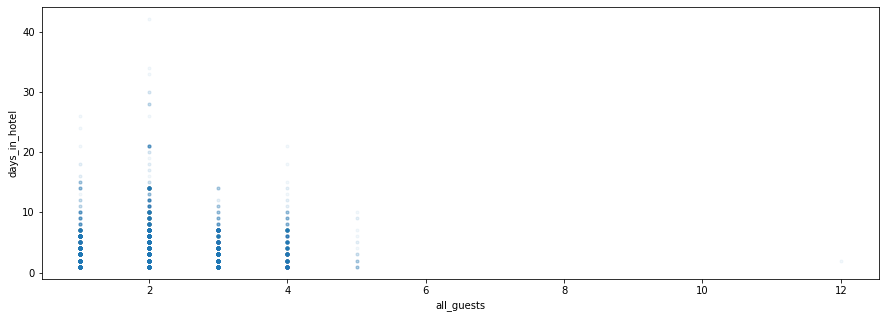

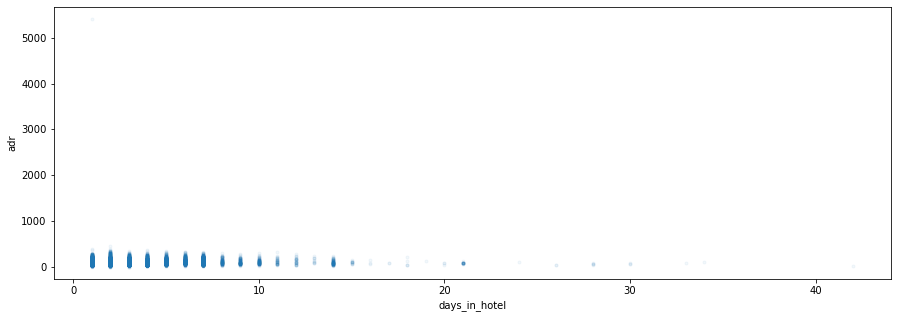

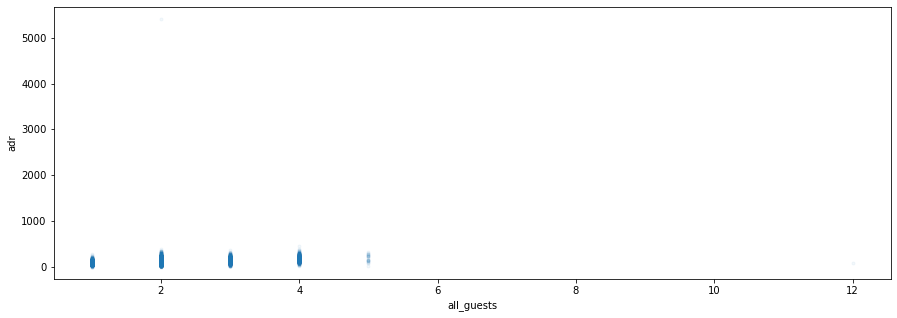

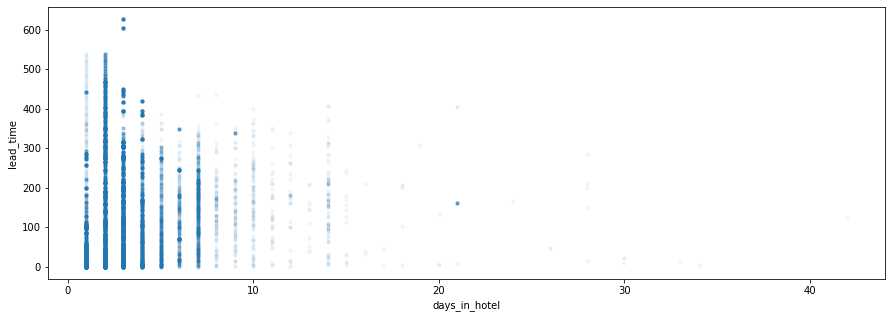

In [30]:
plot_two_columns('all_guests', 'days_in_hotel', portugal_df)
plot_two_columns('days_in_hotel', 'adr', portugal_df)
plot_two_columns('all_guests', 'adr', portugal_df)
plot_two_columns('days_in_hotel', 'lead_time', portugal_df)

Unnamed: 0                             46619
hotel                             City Hotel
is_canceled                                0
lead_time                                 37
arrival_date_year                       2016
arrival_date_month                   January
arrival_date_week_number                   3
arrival_date_day_of_month                 12
stays_in_weekend_nights                    0
stays_in_week_nights                       2
adults                                     2
children                                   0
babies                                    10
meal                                      BB
country                                  PRT
market_segment                     Online TA
distribution_channel                   TA/TO
is_repeated_guest                          0
previous_cancellations                     0
previous_bookings_not_canceled             0
reserved_room_type                         D
assigned_room_type                         D
booking_ch

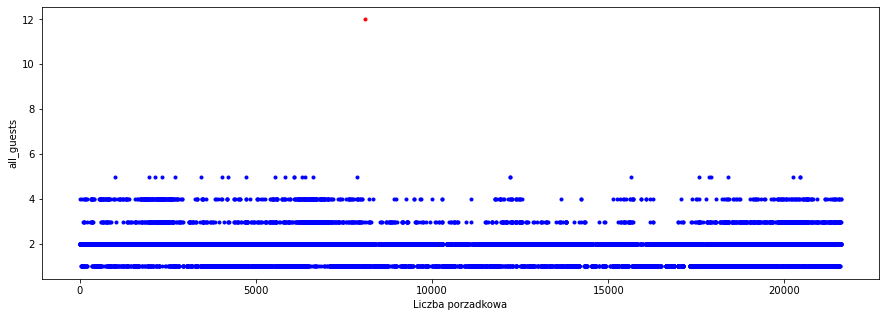

Unnamed: 0                                 3784
hotel                              Resort Hotel
is_canceled                                   1
lead_time                                    13
arrival_date_year                          2016
arrival_date_month                      January
arrival_date_week_number                      2
arrival_date_day_of_month                     5
stays_in_weekend_nights                       8
stays_in_week_nights                         20
adults                                        2
children                                      0
babies                                        0
meal                                  Undefined
country                                     PRT
market_segment                    Offline TA/TO
distribution_channel                      TA/TO
is_repeated_guest                             0
previous_cancellations                        0
previous_bookings_not_canceled                0
reserved_room_type                      

Unnamed: 0                                 4287
hotel                              Resort Hotel
is_canceled                                   1
lead_time                                    61
arrival_date_year                          2016
arrival_date_month                        March
arrival_date_week_number                     10
arrival_date_day_of_month                     1
stays_in_weekend_nights                       4
stays_in_week_nights                         10
adults                                        2
children                                      0
babies                                        0
meal                                         BB
country                                     PRT
market_segment                    Offline TA/TO
distribution_channel                      TA/TO
is_repeated_guest                             0
previous_cancellations                        0
previous_bookings_not_canceled                0
reserved_room_type                      

Unnamed: 0                                4802
hotel                             Resort Hotel
is_canceled                                  1
lead_time                                   45
arrival_date_year                         2016
arrival_date_month                       March
arrival_date_week_number                    14
arrival_date_day_of_month                   31
stays_in_weekend_nights                      4
stays_in_week_nights                        13
adults                                       2
children                                     0
babies                                       0
meal                                        BB
country                                    PRT
market_segment                       Online TA
distribution_channel                     TA/TO
is_repeated_guest                            0
previous_cancellations                       0
previous_bookings_not_canceled               0
reserved_room_type                           D
assigned_room

Unnamed: 0                                   5277
hotel                                Resort Hotel
is_canceled                                     1
lead_time                                      95
arrival_date_year                            2016
arrival_date_month                          April
arrival_date_week_number                       17
arrival_date_day_of_month                      23
stays_in_weekend_nights                         4
stays_in_week_nights                           10
adults                                          2
children                                        0
babies                                          0
meal                                           BB
country                                       PRT
market_segment                             Groups
distribution_channel                        TA/TO
is_repeated_guest                               0
previous_cancellations                          0
previous_bookings_not_canceled                  0


Unnamed: 0                                5779
hotel                             Resort Hotel
is_canceled                                  1
lead_time                                    3
arrival_date_year                         2016
arrival_date_month                         May
arrival_date_week_number                    20
arrival_date_day_of_month                   13
stays_in_weekend_nights                      4
stays_in_week_nights                        10
adults                                       2
children                                     0
babies                                       0
meal                                        BB
country                                    PRT
market_segment                       Corporate
distribution_channel                 Corporate
is_repeated_guest                            0
previous_cancellations                       0
previous_bookings_not_canceled               0
reserved_room_type                           A
assigned_room

Name: 2571, dtype: object

Unnamed: 0                                6397
hotel                             Resort Hotel
is_canceled                                  1
lead_time                                  151
arrival_date_year                         2016
arrival_date_month                        June
arrival_date_week_number                    24
arrival_date_day_of_month                    7
stays_in_weekend_nights                      4
stays_in_week_nights                        10
adults                                       2
children                                     0
babies                                       0
meal                                        BB
country                                    PRT
market_segment                       Online TA
distribution_channel                     TA/TO
is_repeated_guest                            0
previous_cancellations                       0
previous_bookings_not_canceled               0
reserved_room_type               

Unnamed: 0                                6757
hotel                             Resort Hotel
is_canceled                                  1
lead_time                                  168
arrival_date_year                         2016
arrival_date_month                        June
arrival_date_week_number                    27
arrival_date_day_of_month                   29
stays_in_weekend_nights                      4
stays_in_week_nights                        11
adults                                       2
children                                     0
babies                                       0
meal                                        BB
country                                    PRT
market_segment                       Online TA
distribution_channel                     TA/TO
is_repeated_guest                            0
previous_cancellations                       0
previous_bookings_not_canceled               0
reserved_room_type                           A
assigned_room

Unnamed: 0                                7302
hotel                             Resort Hotel
is_canceled                                  1
lead_time                                  209
arrival_date_year                         2016
arrival_date_month                      August
arrival_date_week_number                    32
arrival_date_day_of_month                    1
stays_in_weekend_nights                      4
stays_in_week_nights                        10
adults                                       2
children                                     0
babies                                       0
meal                                        BB
country                                    PRT
market_segment                       Online TA
distribution_channel                     TA/TO
is_repeated_guest                            0
previous_cancellations                       0
previous_bookings_not_canceled               0
reserved_room_type                           A
assigned_room

Unnamed: 0                                 7695
hotel                              Resort Hotel
is_canceled                                   1
lead_time                                   218
arrival_date_year                          2016
arrival_date_month                       August
arrival_date_week_number                     34
arrival_date_day_of_month                    20
stays_in_weekend_nights                       4
stays_in_week_nights                         10
adults                                        2
children                                      0
babies                                        0
meal                                         BB
country                                     PRT
market_segment                    Offline TA/TO
distribution_channel                      TA/TO
is_repeated_guest                             0
previous_cancellations                        0
previous_bookings_not_canceled                0
reserved_room_type                      

Unnamed: 0                                8129
hotel                             Resort Hotel
is_canceled                                  1
lead_time                                  236
arrival_date_year                         2016
arrival_date_month                   September
arrival_date_week_number                    38
arrival_date_day_of_month                   12
stays_in_weekend_nights                      5
stays_in_week_nights                        10
adults                                       2
children                                     2
babies                                       0
meal                                        BB
country                                    PRT
market_segment                       Online TA
distribution_channel                     TA/TO
is_repeated_guest                            0
previous_cancellations                       0
previous_bookings_not_canceled               0
reserved_room_type                           G
assigned_room

Name: 4743, dtype: object

Unnamed: 0                                8505
hotel                             Resort Hotel
is_canceled                                  1
lead_time                                  403
arrival_date_year                         2016
arrival_date_month                     October
arrival_date_week_number                    40
arrival_date_day_of_month                    1
stays_in_weekend_nights                      6
stays_in_week_nights                        15
adults                                       2
children                                     0
babies                                       0
meal                                        BB
country                                    PRT
market_segment                       Online TA
distribution_channel                     TA/TO
is_repeated_guest                            0
previous_cancellations                       0
previous_bookings_not_canceled               0
reserved_room_type               

Unnamed: 0                               15227
hotel                             Resort Hotel
is_canceled                                  0
lead_time                                   99
arrival_date_year                         2016
arrival_date_month                        June
arrival_date_week_number                    23
arrival_date_day_of_month                    1
stays_in_weekend_nights                      4
stays_in_week_nights                        10
adults                                       2
children                                     0
babies                                       0
meal                                        BB
country                                    PRT
market_segment                          Direct
distribution_channel                    Direct
is_repeated_guest                            1
previous_cancellations                       0
previous_bookings_not_canceled               1
reserved_room_type                           E
assigned_room

Unnamed: 0                                  25105
hotel                                Resort Hotel
is_canceled                                     0
lead_time                                     107
arrival_date_year                            2016
arrival_date_month                           June
arrival_date_week_number                       23
arrival_date_day_of_month                       1
stays_in_weekend_nights                         4
stays_in_week_nights                           10
adults                                          2
children                                        0
babies                                          0
meal                                           BB
country                                       PRT
market_segment                             Direct
distribution_channel                       Direct
is_repeated_guest                               0
previous_cancellations                          0
previous_bookings_not_canceled                  0


Unnamed: 0                               26661
hotel                             Resort Hotel
is_canceled                                  0
lead_time                                  138
arrival_date_year                         2016
arrival_date_month                        July
arrival_date_week_number                    31
arrival_date_day_of_month                   24
stays_in_weekend_nights                      4
stays_in_week_nights                        10
adults                                       3
children                                     0
babies                                       0
meal                                        FB
country                                    PRT
market_segment                       Online TA
distribution_channel                     TA/TO
is_repeated_guest                            0
previous_cancellations                       0
previous_bookings_not_canceled               0
reserved_room_type                           C
assigned_room

Unnamed: 0                                27759
hotel                              Resort Hotel
is_canceled                                   0
lead_time                                   222
arrival_date_year                          2016
arrival_date_month                       August
arrival_date_week_number                     35
arrival_date_day_of_month                    27
stays_in_weekend_nights                       4
stays_in_week_nights                         10
adults                                        2
children                                      0
babies                                        0
meal                                         HB
country                                     PRT
market_segment                    Offline TA/TO
distribution_channel                      TA/TO
is_repeated_guest                             0
previous_cancellations                        0
previous_bookings_not_canceled                0
reserved_room_type                      

Unnamed: 0                                31705
hotel                              Resort Hotel
is_canceled                                   0
lead_time                                    61
arrival_date_year                          2016
arrival_date_month                     December
arrival_date_week_number                     52
arrival_date_day_of_month                    22
stays_in_weekend_nights                       4
stays_in_week_nights                         10
adults                                        2
children                                      0
babies                                        0
meal                                  Undefined
country                                     PRT
market_segment                    Offline TA/TO
distribution_channel                      TA/TO
is_repeated_guest                             0
previous_cancellations                        0
previous_bookings_not_canceled                0
reserved_room_type                      

Unnamed: 0                             48902
hotel                             City Hotel
is_canceled                                1
lead_time                                 64
arrival_date_year                       2016
arrival_date_month                     April
arrival_date_week_number                  14
arrival_date_day_of_month                  1
stays_in_weekend_nights                    4
stays_in_week_nights                      10
adults                                     1
children                                   0
babies                                     0
meal                                      BB
country                                  PRT
market_segment                     Online TA
distribution_channel                   TA/TO
is_repeated_guest                          0
previous_cancellations                     0
previous_bookings_not_canceled             0
reserved_room_type                         D
assigned_room_type                         D
booking_ch

Unnamed: 0                                59264
hotel                                City Hotel
is_canceled                                   1
lead_time                                   152
arrival_date_year                          2016
arrival_date_month                      October
arrival_date_week_number                     44
arrival_date_day_of_month                    24
stays_in_weekend_nights                       4
stays_in_week_nights                         10
adults                                        2
children                                      0
babies                                        0
meal                                         BB
country                                     PRT
market_segment                    Offline TA/TO
distribution_channel                      TA/TO
is_repeated_guest                             0
previous_cancellations                        0
previous_bookings_not_canceled                0
reserved_room_type                      

Unnamed: 0                             82098
hotel                             City Hotel
is_canceled                                1
lead_time                                 21
arrival_date_year                       2016
arrival_date_month                   January
arrival_date_week_number                   2
arrival_date_day_of_month                  8
stays_in_weekend_nights                    8
stays_in_week_nights                      22
adults                                     2
children                                   0
babies                                     0
meal                                      BB
country                                  PRT
market_segment                        Direct
distribution_channel                  Direct
is_repeated_guest                          0
previous_cancellations                     1
previous_bookings_not_canceled             0
reserved_room_type                         A
assigned_room_type                         A
booking_ch

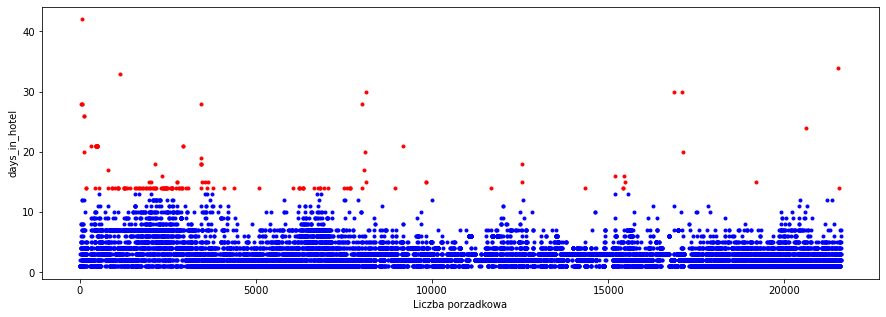

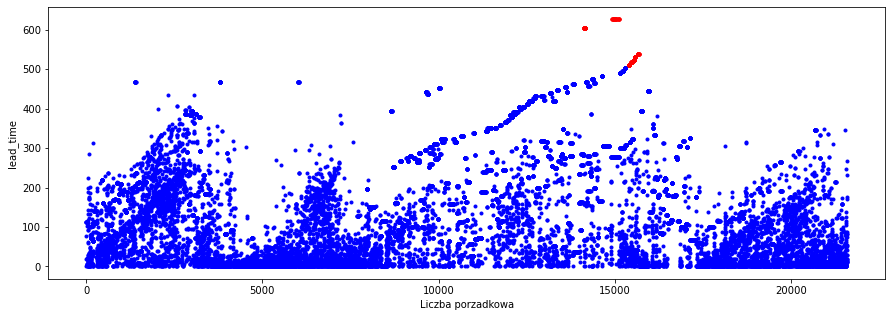

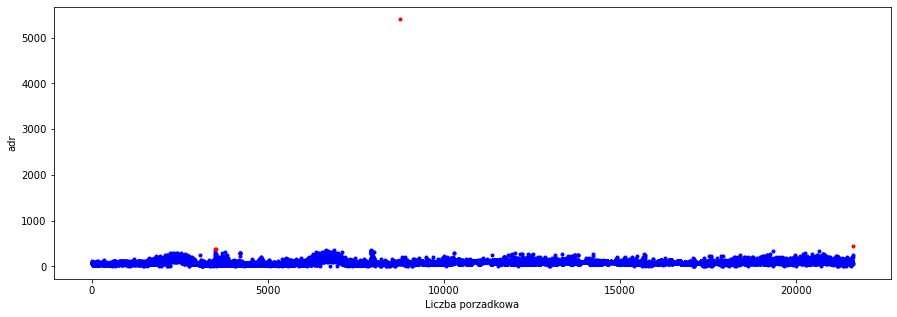

In [32]:
#Liczba gosci
show_isolated_cases(portugal_df, 'all_guests', 5, True)
#Czas pobytu
show_isolated_cases(portugal_df, 'days_in_hotel', 5, True)
#Wczesniejsza rezerwacja
show_isolated_cases(portugal_df, 'lead_time')
#Cena z dobe
show_isolated_cases(portugal_df, 'adr', 5)

In [33]:
print(len(portugal_df))

to_remove_labels = remove_outliners(portugal_df, 'lead_time')
portugal_df = portugal_df.drop(to_remove_labels)

to_remove_labels = remove_outliners(portugal_df, 'all_guests', 5)
portugal_df = portugal_df.drop(to_remove_labels)

to_remove_labels = remove_outliners(portugal_df, 'days_in_hotel', 5)
portugal_df = portugal_df.drop(to_remove_labels)

to_remove_labels = remove_outliners(portugal_df, 'adr', 5)
portugal_df = portugal_df.drop(to_remove_labels)
print(len(portugal_df))

21600
21296


In [34]:
from sklearn import preprocessing

def normalize_data(data_frame):
        values = data_frame.values
        min_max_scaler = preprocessing.MinMaxScaler()
        values_scaled = min_max_scaler.fit_transform(values)
        return pandas.DataFrame(values_scaled, columns=data_frame.columns)

In [35]:
portugal_df_normalized = normalize_data(portugal_df)
portugal_df_normalized

,days_in_hotel,lead_time,adr,all_guests
0,0.000000,0.003976,0.240437,0.25
1,0.083333,0.039761,0.322404,0.75
2,0.166667,0.151093,0.155464,0.25
3,0.000000,0.224652,0.193989,0.25
4,0.000000,0.224652,0.193989,0.25
...,...,...,...,...
21291,0.083333,0.107356,0.331967,0.50
21292,0.083333,0.161034,0.691257,0.25
21293,0.333333,0.459245,0.171448,0.25
21294,0.250000,0.339960,0.205137,0.25


In [38]:
#Klasteryzacja
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def calculate_culster_score(data_frame, def_range=50):
    silhouette_scores = []

    for clusters_number in range(2, def_range):
        kmeans = KMeans(n_clusters = clusters_number, n_init=10, max_iter=350, random_state=42)
        kmeans.fit(data_frame)
        sil_score = silhouette_score(X=data_frame, labels=kmeans.labels_, n_jobs=-1)
        print(str(clusters_number) + "  : " + str(sil_score))
        silhouette_scores.append(sil_score)

    index = silhouette_scores.index(max(silhouette_scores))
    plt.plot([i for i in range(2,def_range)], silhouette_scores)
    plt.show()
    return index

2  : 0.3795251296230121
3  : 0.37069785946399236
4  : 0.3462866649900986
5  : 0.35801125212581436
6  : 0.33202734199534767
7  : 0.3201966584831584
8  : 0.3254785345487208
9  : 0.33079035041749133
10  : 0.3435258678114092
11  : 0.3506467934522203
12  : 0.34116516681087694
13  : 0.33360084848704646
14  : 0.32525596630168857
15  : 0.3331897828497446
16  : 0.3357586529821662
17  : 0.3337434771311766
18  : 0.3302609631614429
19  : 0.32976341477925014
20  : 0.3316224173371853
21  : 0.3255476454566871
22  : 0.3182970132744433
23  : 0.33498233144755624
24  : 0.33970811664598943
25  : 0.34148659960196276
26  : 0.34506335905356766
27  : 0.3413654743139325
28  : 0.3385381270283785
29  : 0.34138554600559007
30  : 0.34198959244183047
31  : 0.34625952339687815
32  : 0.34087081270525355
33  : 0.3428106073019168
34  : 0.34447992612414563
35  : 0.3289330834744867
36  : 0.3305044733235128
37  : 0.3209122381249482
38  : 0.3333607501053042
39  : 0.33165814054611203
40  : 0.33643733957339067
41  : 0.337719

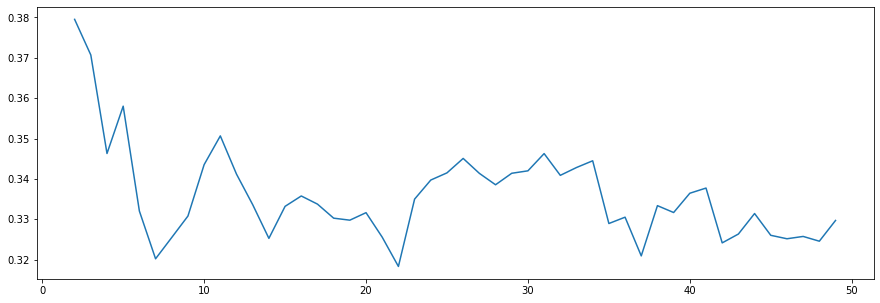

In [39]:
best_idx = calculate_culster_score(portugal_df_normalized)

In [41]:
import matplotlib.cm as cm
def show_clusters(x_column, y_column, df, kmeans_result):
    colors = cm.nipy_spectral(kmeans_result.labels_.astype(float) / len(kmeans_result.cluster_centers_))
    x = df[x_column]
    y = df[y_column]
    plt.scatter(x, y, s=30,lw=0, alpha=0.7, marker='.', c=colors, edgecolor='k')
    
    #cluster_centers = kmeans_result.cluster_centers_
    
    #plt.scatter(cluster_centers[:, df.columns.get_loc(x_column)],
    #           cluster_centers[:, df.columns.get_loc(y_column)],
    #                          marker='o', c='white', alpha=1, s=250, edgecolor='k')
    
    #for i, c in enumerate(cluster_centers):
    #        plt.scatter(c[df.columns.get_loc(x_column)],
    #                  c[df.columns.get_loc(y_column)],
    #                   marker='$%d$'%i, alpha=1, s=50, edgecolor='k')
    
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()
    
def show_3d_clusters(x_column, y_column, z_column, df, kmeans_result):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    colors = cm.nipy_spectral(kmeans_result.labels_.astype(float) / len(kmeans_result.cluster_centers_))
    
    ax.scatter(df[x_column], df[y_column], df[z_column], s=5, lw=0, alpha=0.5, c=colors, edgecolor='k')
    ax.set_xlabel(x_column)
    ax.set_ylabel(y_column)
    ax.set_zlabel(z_column)
    plt.show()

In [45]:
clusters_number = 3
kmeans = KMeans(n_clusters = clusters_number, init='random', max_iter=350, random_state=42)
kmeans_result = kmeans.fit(portugal_df_normalized)

def show_all_clusters(data_frame, kmeans_result):
    print("ALL GUESTS")
    for i in data_frame:
        show_clusters('all_guests', i, data_frame, kmeans_result)

    print("DAYS IN HOTEL")
    #Days in hotel vs others
    for i in data_frame:
        show_clusters('days_in_hotel', i, data_frame, kmeans_result)
        
    print("ADR")
    #days_in_waiting_list vs others
    for i in data_frame:
        show_clusters('adr', i, data_frame, kmeans_result)
    
    print("LEAD TIME")
        #lead_time vs others
    for i in data_frame:
        show_clusters('lead_time', i, data_frame, kmeans_result)


ALL GUESTS


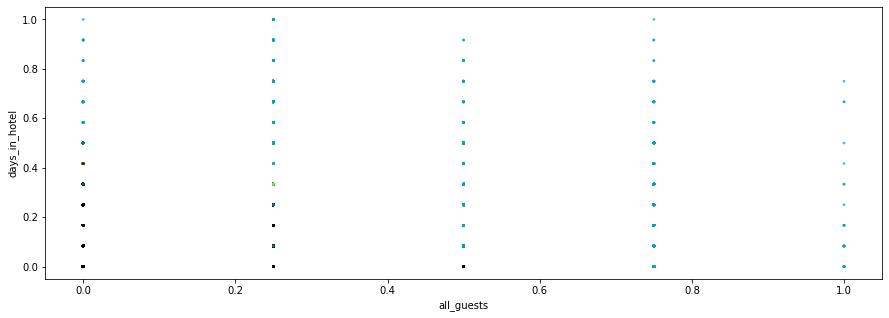

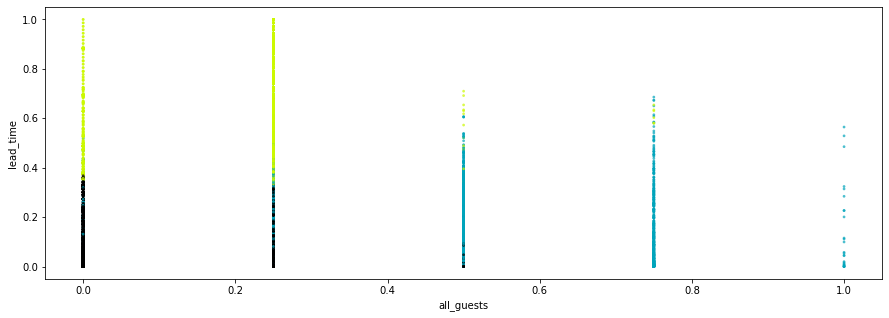

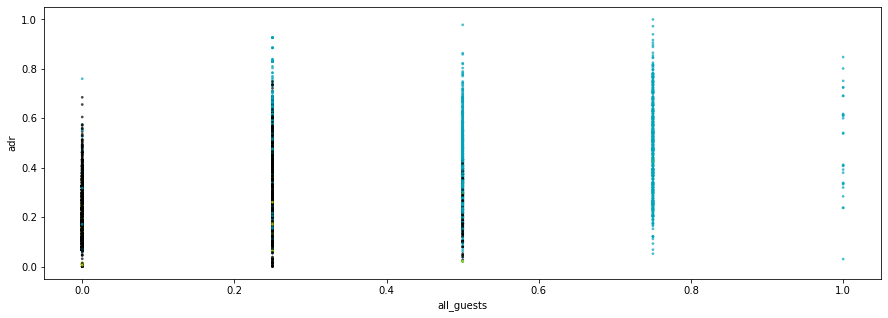

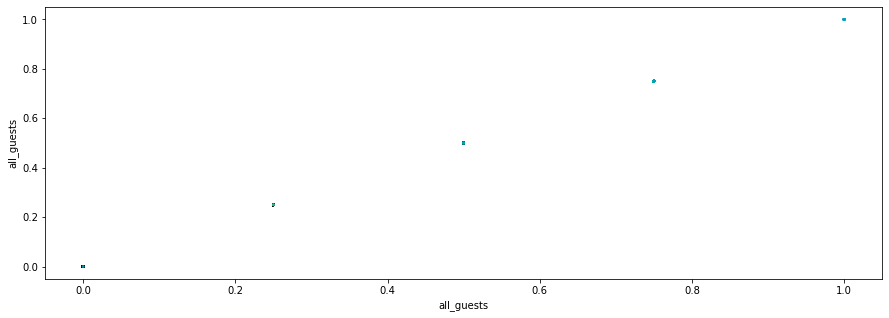

DAYS IN HOTEL


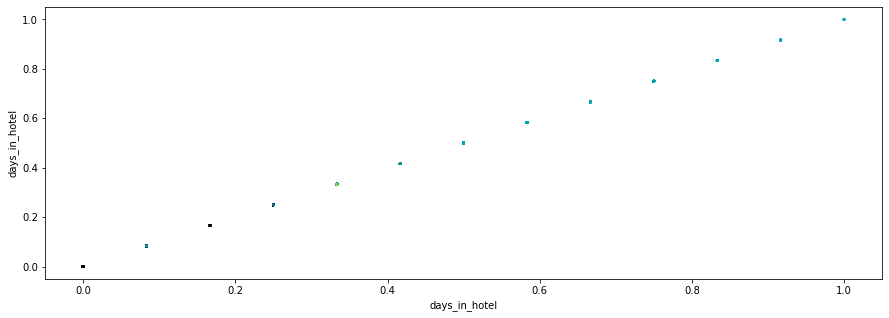

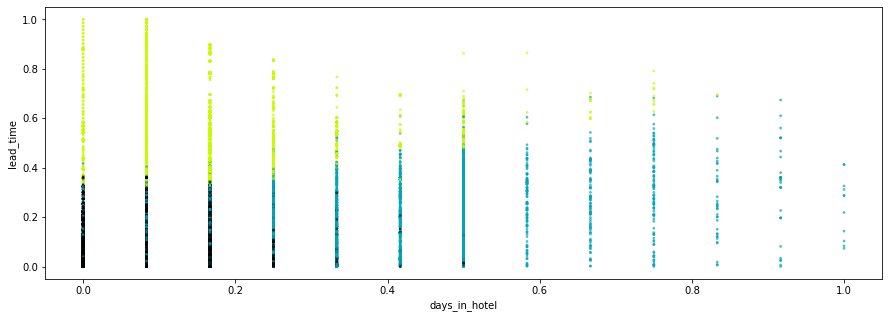

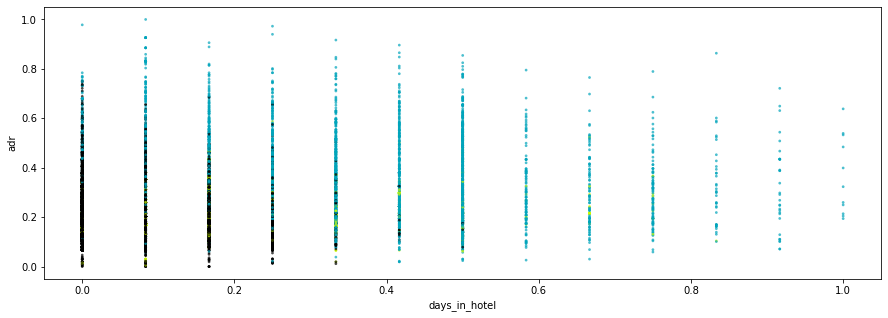

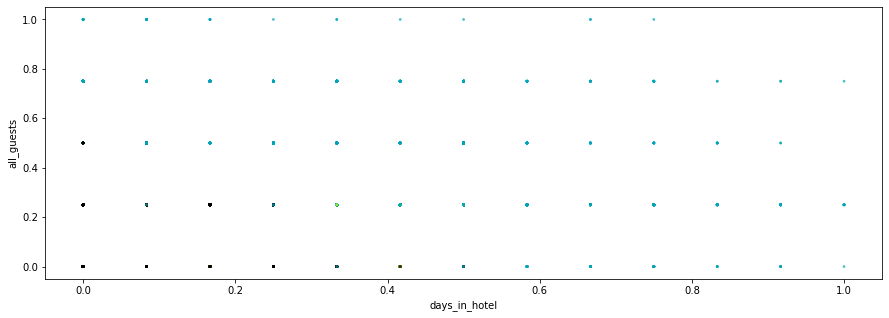

ADR


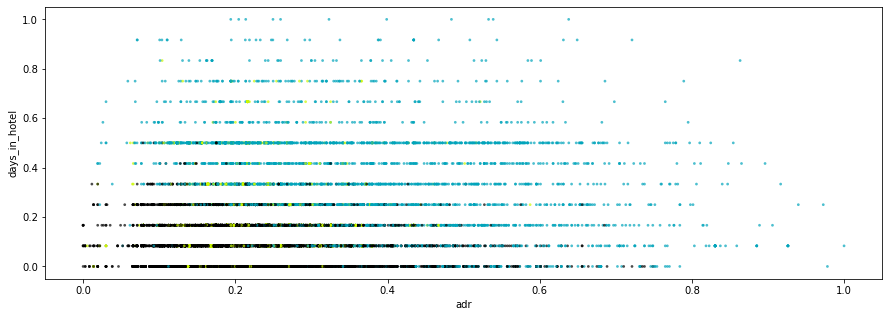

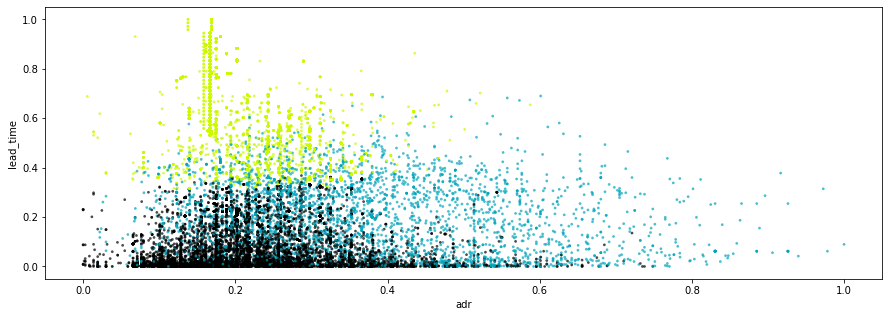

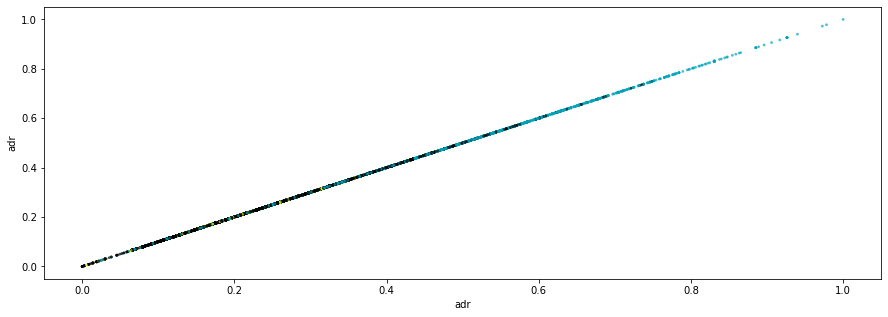

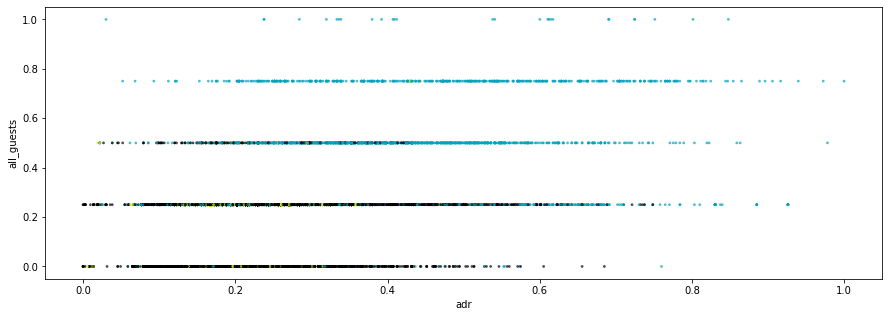

LEAD TIME


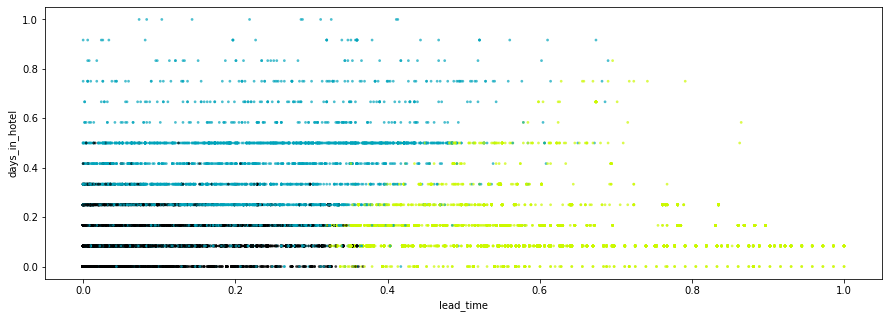

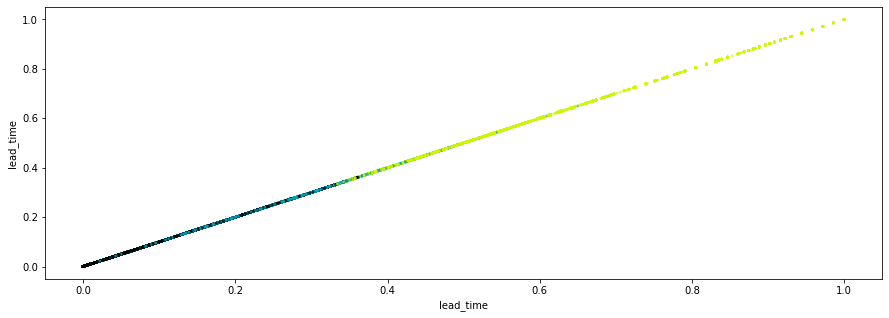

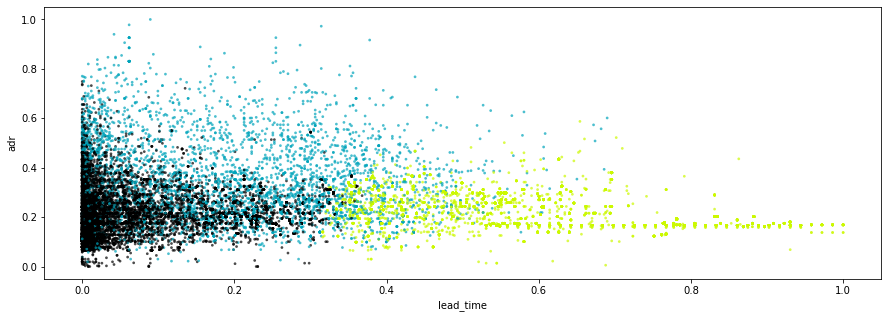

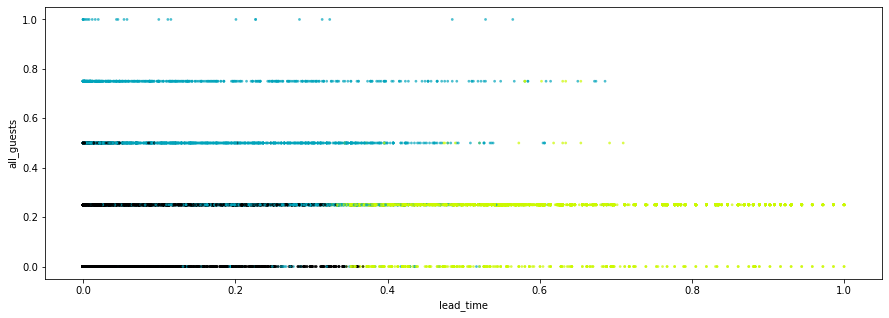

In [46]:
show_all_clusters(portugal_df_normalized, kmeans_result)

In [48]:
#Klasyfikacja
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
#Usywamy jeden element, robimy klasyfikacje i sprawdzamy czy dobrze go przyporzadkowalo

def classify_and_check(idx, data_frame, kmeans_result):
    knn_clasifier = KNeighborsClassifier()
    knn_clasifier.fit(data_frame[
        data_frame.index != idx],
        [label for i, label in enumerate(kmeans_result.labels_) if i != idx]
    )

    prediction = knn_clasifier.predict(data_frame[data_frame.index == idx])
    return (prediction == kmeans_result.labels_[idx])[0]


def classify_and_test(train_set, train_labels, test_set, test_labels, classifier):
    classifier = classifier.fit(train_set, train_labels)

    score = classifier.score(test_set, test_labels)
    print(str(type(classifier)) + " score: " + "{:.2f}%".format(score*100))
    

def divide_and_classify(data_frame, number_of_clusters):
    #70% zbior uczacy (39 090), 30% testowy(16 753)
    divider = int(0.7 * len(data_frame))
    train_set = data_frame[:divider]
    test_set = data_frame[divider:]

    kmeans_all = KMeans(n_clusters = number_of_clusters, n_init=10, max_iter=350, random_state=42)
    kmeans_result_all = kmeans_all.fit(data_frame)

    train_labels = kmeans_result_all.labels_[:divider]
    test_labels = kmeans_result_all.labels_[divider:]
    
    metrics = ['minkowski', 'cityblock', 'cosine']
    for metric in metrics:
        for neigh in range(2, 16):
                knn_clasifier = KNeighborsClassifier(n_neighbors=neigh, metric=metric)
                classify_and_test(train_set, train_labels, test_set, test_labels, knn_clasifier)
        print()
        print()
    

In [49]:
divide_and_classify(portugal_df_normalized, 3)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'> score: 97.97%
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> score: 97.97%
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> score: 97.57%
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> score: 97.59%
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> score: 97.20%
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> score: 97.14%
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> score: 97.17%
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> score: 97.10%
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> score: 97.10%
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> score: 97.20%
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> score: 97.12%
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> score: 96.87%
<class 'sklearn.neighbors._classification.KNeighbors